<a href="https://colab.research.google.com/github/ocbyram/assignment2/blob/main/Assignment_2_Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Data Wrangling and Exploratory Data Analysis
## Do Q1 and Q2, and one other question.

**I did Q3 as my other question!**

**Q1.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

**1. From reading the abstract, this paper is primarily about tidying datasets, and the advantages that having consistent datasets gives one. It does this with a case study example. A tidy dataset is specifically formatted, and the paper will demonstrate why tidy datasets help keep data organized better, as well as only requiring a small number of tools.**


**2. The tidy data standard is intended to "facilitate initial exploration and analysis of data" by structuring a dataset to have data values organized in a specific way.**


**3. The sentence "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." means that tidy datasets all have a similar organization. It is easy to go through them and interpret things, since they all have a uniform framework. Contrary, messy datasets are not similar at all. It is difficult to work with multiple ones, because one may be messy due to one thing, and another may be messy due to a different reason. They are not uniform, so it is difficult to analyze the data. The sentence "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general." means that while you may be able to glance at a dataset and say "this is an observation", it is much more difficult to say "these are my observations, they mean this, and this is why we are using them." This sentence is just pointing out that while you can eventually deduce what an observation or variable is, it's much easier when the data is organized. This helps to learn what the actual observation is saying, rather than just saying "this number must be the observation, but I don't know what it represents”.**


**4. A dataset is a collection of values, and Wickham defines values as numbers or strings. Values belong to both a variable and observation. He defines variables as something that contains all values measured by a specific attribute (this could be anything from shoe size to duration of weather patterns) across units. He defines observations as all values measured on the same unit ( like a person or day) across attributes.**


**5. In section 2.3 Tidy Data is defined with three core principles. Each variable forms a column, each observation forms a row, and each type of observational unit forms a table. Tidy data is a standard way of structuring and organizing a dataset. It makes it easier to see the values.**


**6. The five most common problems with messy datasets are common headers are values (not variable names), multiple variables are stored in one column, variables are stored in both rows and columns, multiple types of observational  units are stored in the same table, a single observational unit is stored in multiple tables. The data in table 4 is messy because the columns have not been turned into rows. We need to melt it in order for it to become tidy. Melting a data set means switching it around so that the columns are an additional row in the data set. For example '<$10k' would be a column next to every religion. All of the other incomes would also be paired with every religion as a column. Essentially, you match each of the column names (income in this case) to each religion, as a new column.**


**7. Table 11 is messy because the date is incredibly unorganized. The year and month are separate columns, and the days are all their own columns. In order to make the dataset more tidy, the date should be consolidated, as well as the days (d1, d2, etc.) being moved into rows. Anywhere there is a value, the day needs to be a row, which is why d3 has two rows in Table 12. This is what makes Table 12 essentially tidy, since it is molten.**


**8. The 'chicken-and-egg' problem is that if tidy data is only as useful as the tools that work with it, then tidy tools will be linked to tidy data. This means that these datasets cannot improve if the tools aren't improving, but the tools can't improve if the datasets don't either. Wickham hopes that in the future people will be able to build on the framework and develop better data storage strategies/tools. He thinks that there is more work to be done, and this is not the best that things can be. There are issues that tidy data doesn't solve. He hopes to use methodologies to improve understanding of the cognitive side of data analysis.**

**Q2.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_NYC.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the `./data/sharks.csv` data covered in the lecture, clean the "Type" variable as well as you can, and explain the choices you make.
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

**Q2.1**

In [13]:
import pandas as pd
df = pd.read_csv('assignment2/data/airbnb_hw.csv')
price = 'Price'
print('Before coercion: \n', df[price].describe(),'\n')
df[price] = df[price].str.replace(",", "")
df[price] = pd.to_numeric(df['Price'], errors='coerce')
df[price+'_nan'] = df[price].isnull()
print('After coercion: \n', df[price].describe(),'\n')
print('Total Missings: \n', sum(df[price+'_nan']),'\n')

Before coercion: 
 count     30478
unique      511
top         150
freq       1481
Name: Price, dtype: object 

After coercion: 
 count    30478.000000
mean       163.589737
std        197.785454
min         10.000000
25%         80.000000
50%        125.000000
75%        195.000000
max      10000.000000
Name: Price, dtype: float64 

Total Missings: 
 0 



**I read in the airbnb data as df. The first thing I did was make the variable price, which is just equal to the column 'Price'. This makes it so that if I change the name of the column, I only need to change the variable to match it, instead of searching through all my code to change every 'Price' to the new column name. Then I used describe to see what type of variable I am working with. It was input as an str, so I used coercion to change it into a float. This makes it easier to work with since price is numerical. You can see the before and after coercion summaries above. Finally, I noticed that when a number goes above 999 it gains a comma. Pandas will drop it if it contains a comma, so I needed to replace the commas with nothing. This ensures I have as few null values as possible. I used the replace function to do this. Then I used is null to find and report the number of null values that are left in dataset. I ended up with 0 missing values since I removed the commas from the numbers over 999.**

**Q2.2**

In [14]:
import numpy as np
dfshark = pd.read_csv('assignment2/data/sharks.csv')
dfshark = dfshark.rename(columns = {'Type':'Type of Attack'})
type = 'Type of Attack'
dfshark[type] = dfshark[type].replace('Unverified','Unconfirmed')
dfshark[type] = dfshark[type].replace('Invalid','Unconfirmed')
dfshark[type] = dfshark[type].replace('Under investigation','Unconfirmed')
dfshark[type] = dfshark[type].replace('Questionable','Unconfirmed')
dfshark[type] = dfshark[type].replace('Boating','Boat')
dfshark[type] = dfshark[type].replace('Boatomg','Boat')
dfshark[type] = dfshark[type].replace('Watercraft','Boat')
dfshark[type] = dfshark[type].replace(np.nan, 'NaN')
dfshark[type].unique()
dfshark[type].value_counts()


<ipython-input-14-88c12ae3b050>:2: DtypeWarning: Columns (10,17,18,19,20,21,24) have mixed types. Specify dtype option on import or set low_memory=False.
  dfshark = pd.read_csv('assignment2/data/sharks.csv')


Unprovoked      4716
Provoked         593
Unconfirmed      565
Boat             344
Sea Disaster     239
NaN                5
Name: Type of Attack, dtype: int64

**The first thing I did to clean this variable was rename the column. "Type" felt ambiguous, so I changed it to 'Type of Attack'. Reading through the data in the column, it's obvious that this was a fill in the blank. There is a variety of answers that needed to be consolidated, because they were similar to eachother. For example; 'boating', 'boatomg', boat', and 'watercraft' could all fit under the variable 'boat'. I renamed these variables to boat so that I could group and count them easier. I did the same thinf with 'unverified', 'invalid', 'under investigation', and 'questionable'. This allows the data to be manipulated easier, since I am not dealing with 15 categories of similar types of attacks. FInally, I replaced the missing varaibles (np.nan) with 'NaN'. This allows me to ensure that the missing varaibles are still being accounted for, because missing data can be as useful as the data that is there.**

**Q2.3**

In [15]:
import numpy as np
url = 'http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv'
dftrial = pd.read_csv(url,low_memory=False)
dftrial['WhetherDefendantWasReleasedPretrial']
dftrial['WhetherDefendantWasReleasedPretrial'] = dftrial['WhetherDefendantWasReleasedPretrial'].replace(9, np.nan)
print(dftrial['WhetherDefendantWasReleasedPretrial'].value_counts())

KeyboardInterrupt: ignored

**Q2.4**

In [ ]:
var = 'ImposedSentenceAllChargeInContactEvent'
dftrial[var] = pd.to_numeric(dftrial[var], errors='coerce')
dftrial['imposed_na'] = dftrial[var].isnull()

dftrial.loc[ dftrial['SentenceTypeAllChargesAtConvictionInContactEvent'] == 9, 'ImposedSentenceAllChargeInContactEvent'] = np.nan #Unknown
dftrial['Other'] = (dftrial['SentenceTypeAllChargesAtConvictionInContactEvent'] == 1)
dftrial['ImposedSentenceAllChargeInContactEvent'].mask(dftrial['SentenceTypeAllChargesAtConvictionInContactEvent'] ==4 , np.nan )
dftrial['imposed_na]'] = dftrial['ImposedSentenceAllChargeInContactEvent'].isnull()
print(pd.crosstab(dftrial['imposed_na'],dftrial['SentenceTypeAllChargesAtConvictionInContactEvent']),'\n')

**For this data, I coerced it and looked at the number of nulls. There were a lot of them, so I knew something was suspicious. I looked at the crosstab with ImposedSentenceAllChargeInContactEvent and saw many of the numbers were false (specifically codes 4 and 9). I looked at the codebook and saw that code 9 is unknown. I replaced that with unknown. For code 4, I noticed that it was the only code that was 'other'. Every other code had some sort of sentence, but code 4 meant no sentence because the case was dismissed, deferred, pending, etc. I created an Other dummy variable and set it to be 1. Then I updated the values and printed out the new crosstab. All of this was necessary because there were many missing values, for multiple reasons. It's important to make sure those reasons are documented and taken care of correctly, because missing data tells us as much of a story as the data that is there.**


**Q3.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Notice that your graph is "bi-modal", having two little peaks that represent locally most common values. Now group your graph by `level` and `control`. What explains the bi-modal nature of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

**Q3.1**

In [17]:
dfcollege = pd.read_csv('assignment2/data/college_completion.csv')


**Q3.2**

In [18]:
print(dfcollege.shape)
print(dfcollege.dtypes)
print(dfcollege.head)

(3798, 63)
index                int64
unitid               int64
chronname           object
city                object
state               object
                    ...   
state_sector_ct      int64
carnegie_ct          int64
counted_pct         object
nicknames           object
cohort_size        float64
Length: 63, dtype: object
<bound method NDFrame.head of       index  unitid                                chronname             city  \
0         0  100654                   Alabama A&M University           Normal   
1         1  100663      University of Alabama at Birmingham       Birmingham   
2         2  100690                       Amridge University       Montgomery   
3         3  100706      University of Alabama at Huntsville       Huntsville   
4         4  100724                 Alabama State University       Montgomery   
...     ...     ...                                      ...              ...   
3793   3793  461528                Grace College of Divinity     Faye

**There are 3,798 rows and 63 columns in this dataset. That means there are 3,798 observations. The types of data are listed before the head of the data is printed.**

**Q3.3**

In [19]:
pd.crosstab(dfcollege['control'], dfcollege['level'])

level,2-year,4-year
control,,
Private for-profit,465,527
Private not-for-profit,68,1180
Public,926,632


**One evident pattern is that 4-year private not-for-profit schools have the highest number of observations, with 2-year public schools having the second highest. 2-year private not-for-profit schools have the smallest amount by far. The other numbers in the cross tabulation are similar.**

**Q3.4**

Axes(0.125,0.11;0.775x0.77)


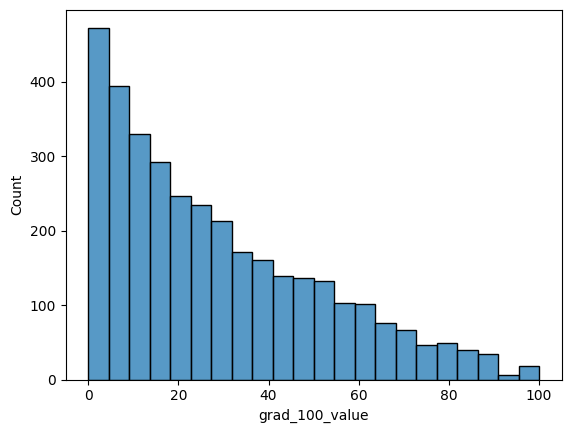

In [20]:
import seaborn as sns
print(sns.histplot(dfcollege['grad_100_value']))

Axes(0.125,0.11;0.775x0.77)


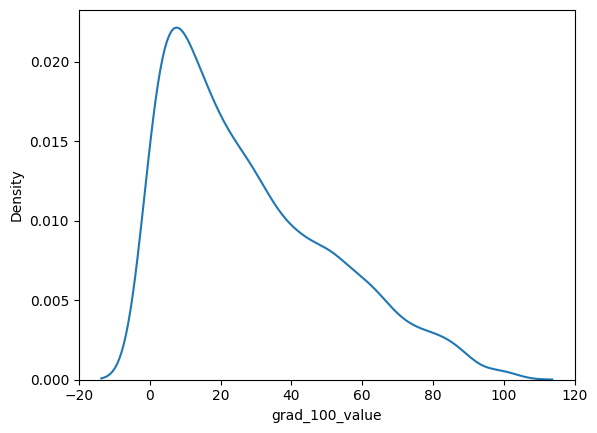

In [21]:
print(sns.kdeplot(dfcollege['grad_100_value']))

Axes(0.125,0.11;0.775x0.77)


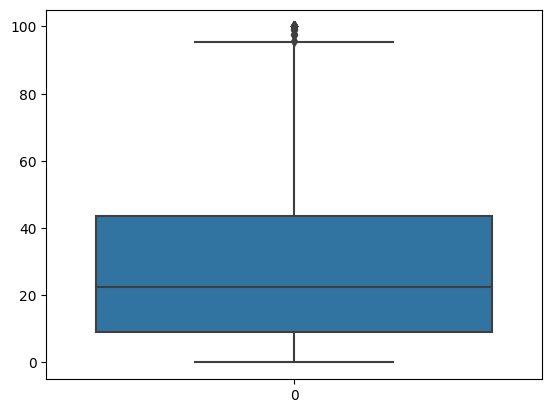

In [22]:
print(sns.boxplot(dfcollege['grad_100_value']))

In [47]:
print(dfcollege['grad_100_value'].describe())

count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64


**Q3.5**

Axes(0.125,0.11;0.775x0.77)


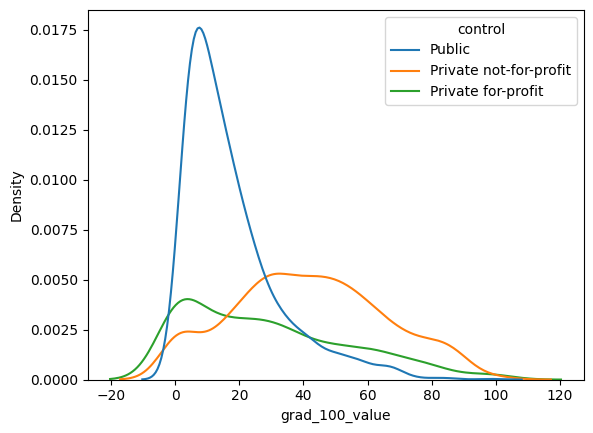

In [66]:
print(sns.kdeplot(x = dfcollege['grad_100_value'], hue=dfcollege['control']))

**In this kernel density plot by control, I see that Public schools have the highest distribution. Private not-for-profit schools have the largest spread, while still having the second highest density. Private not-for-public schools seem to have the highest graduation rate per density.**

Axes(0.125,0.11;0.775x0.77)


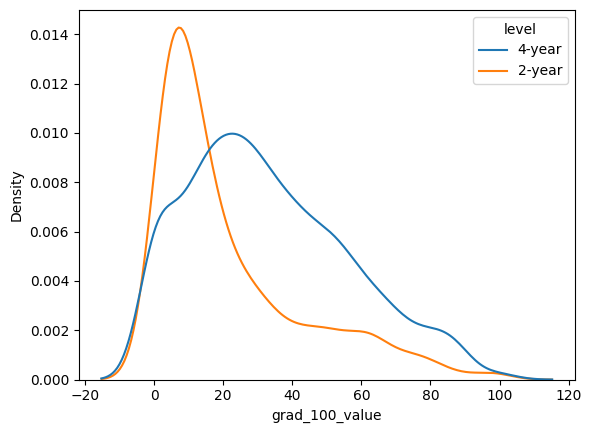

In [64]:
print(sns.kdeplot(x = dfcollege['grad_100_value'], hue=dfcollege['level']))

**In this kernel density plot by level, you can see that 4-year has a lower density, but higher average graduation rate. The spread is larger than 2-year. We can see that 4-year on average has higher graudation percentages.**

In [67]:
grouped = dfcollege.groupby(['level', 'control']).describe()
print(grouped)

                                index                                   \
                                count         mean          std    min   
level  control                                                           
2-year Private for-profit       465.0  2604.780645  1106.442974   40.0   
       Private not-for-profit    68.0  2202.352941   887.024386  147.0   
       Public                   926.0  1569.205184  1004.849540    6.0   
4-year Private for-profit       527.0  2643.506641  1201.064976   12.0   
       Private not-for-profit  1180.0  1669.577119   915.147558    2.0   
       Public                   632.0  1634.821203   914.388766    0.0   

                                                                 unitid  \
                                   25%     50%      75%     max   count   
level  control                                                            
2-year Private for-profit      2108.00  3126.0  3453.00  3796.0   465.0   
       Private not-for-profit  16

**4-year private not-for-profit schools have the highest/best graduation rates.**



**Q3.6**

<Axes: xlabel='grad_100_value', ylabel='Density'>

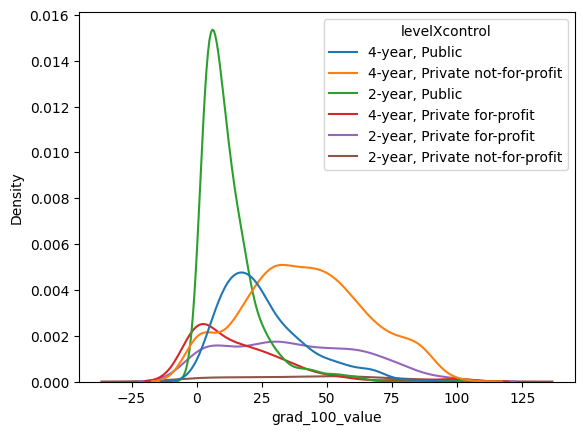

In [68]:
dfcollege['levelXcontrol']=dfcollege['level']+', '+dfcollege['control']
sns.kdeplot(data=dfcollege, x=dfcollege['grad_100_value'], hue=dfcollege['levelXcontrol'] )

**At first glance, you want to say that 2-year, public has the best graduation rates. However, looking closer, we can see that while they have high density, that density is centered around a lower average grad_100_value than the other levelxcontrols. Because of this, I believe that 4-year, private not-for-profit colleges have the best graduation rates. It has the second highest density, and a larger average grad_100_value, although the distribution is stair fairly wide. Then I would say 4 year public and 2 year private for-proft also have better graduation rates than the other types of colleges listed.**

**Q3.7**

Axes(0.125,0.11;0.775x0.77)


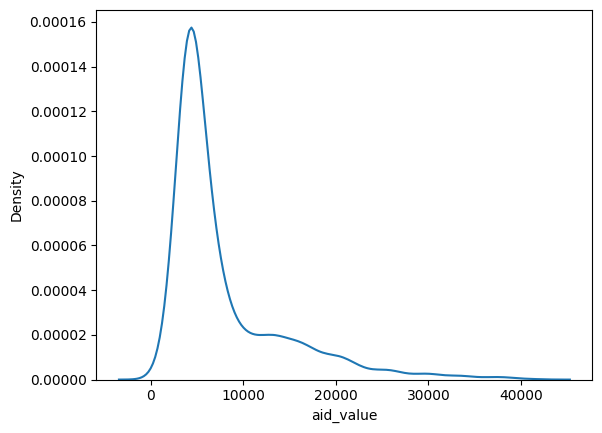

In [69]:
print(sns.kdeplot(x = dfcollege['aid_value']))

Axes(0.125,0.11;0.775x0.77)


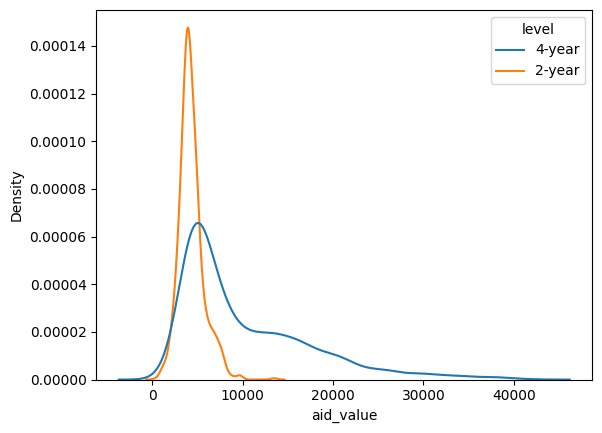

In [70]:
print(sns.kdeplot(x = dfcollege['aid_value'], hue= dfcollege['level']))

Axes(0.125,0.11;0.775x0.77)


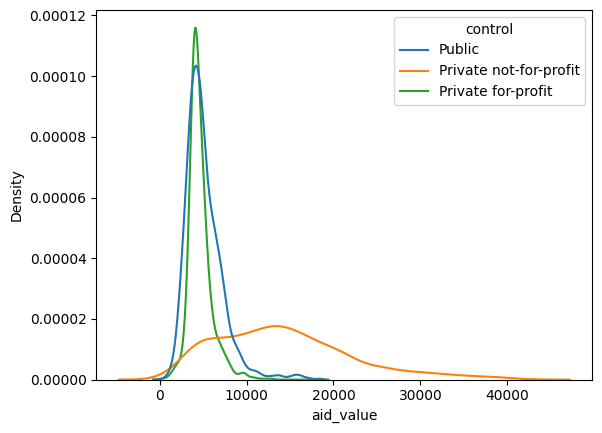

In [71]:
print(sns.kdeplot(x = dfcollege['aid_value'], hue= dfcollege['control']))

**The bi-modal nature of the graph is explained by the distinctive groups. It is bi-modal in the first graph because there are two main amounts of aid given out.**

In [72]:
grouped_aid = dfcollege.groupby(['level', 'control']).describe()
grouped_aid

index                                   \
                                count         mean          std    min   
level  control                                                           
2-year Private for-profit       465.0  2604.780645  1106.442974   40.0   
       Private not-for-profit    68.0  2202.352941   887.024386  147.0   
       Public                   926.0  1569.205184  1004.849540    6.0   
4-year Private for-profit       527.0  2643.506641  1201.064976   12.0   
       Private not-for-profit  1180.0  1669.577119   915.147558    2.0   
       Public                   632.0  1634.821203   914.388766    0.0   

                                                                 unitid  \
                                   25%     50%      75%     max   count   
level  control                                                            
2-year Private for-profit      2108.00  3126.0  3453.00  3796.0   465.0   
       Private not-for-profit  1675.75  2326.5  3091.75  3549.0    68.0   
       Public                   708.25  1507.0  2498.75  3792.0   926.0   
4-year Private for-profit      1681.00  3238.0  3554.50  3797.0   527.0   
       Private not-for-profit   892.75  1669.5  2413.25  3794.0  1180.0   
       Public                   841.75  1641.0  2381.25  3688.0   632.0   

                                              ... carnegie_ct         \
                                        mean  ...         75%    max   
level  control                                ...                      
2-year Private for-profit      313171.550538  ...       517.0  517.0   
       Private not-for-profit  250229.470588  ...        73.0  517.0   
       Public                  190147.817495  ...       289.0  289.0   
4-year Private for-profit      327677.552182  ...       343.0  517.0   
       Private not-for-profit  194489.574576  ...       343.0  517.0   
       Public                  186217.174051  ...       386.0  386.0   

                              cohort_size                                 \
                                    count         mean          std  min   
level  control                                                             
2-year Private for-profit           461.0   350.559653   831.927335  3.0   
       Private not-for-profit        68.0   159.882353   171.968891  1.0   
       Public                       926.0   797.755940   829.101262  2.0   
4-year Private for-profit           318.0   105.396226   235.219946  1.0   
       Private not-for-profit      1121.0   398.231936   459.528355  1.0   
       Public                       573.0  1555.342059  1497.792586  1.0   

                                                                 
                                  25%     50%      75%      max  
level  control                                                   
2-year Private for-profit       69.00   193.0   408.00  16229.0  
       Private not-for-profit   23.75    86.0   294.25    591.0  
       Public                  306.25   544.5  1026.25  13104.0  
4-year Private for-profit       10.00    31.0   118.75   3240.0  
       Private not-for-profit  113.00   288.0   507.00   4157.0  
       Public                  479.00  1038.0  2105.00   8025.0  

[6 rows x 408 columns]

**Q3.8**

<Axes: xlabel='grad_100_value', ylabel='aid_value'>

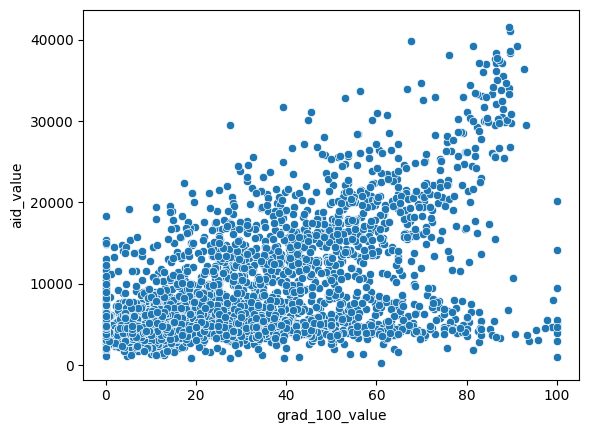

In [56]:
sns.scatterplot(x=dfcollege['grad_100_value'],y=dfcollege['aid_value'])

**Looking at the scatterplot, it appears that there is a positive correlation between grad_100_value and aid_value. As aid_value increases, so does grad_100_value. Aid seems to increase gradiuation rates.**

<Axes: xlabel='grad_100_value', ylabel='aid_value'>

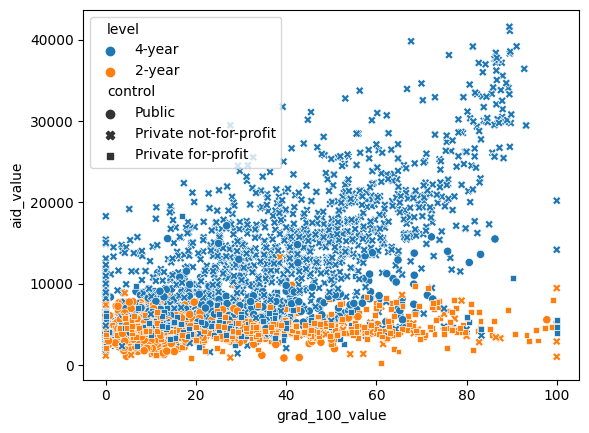

In [61]:
sns.scatterplot( x=dfcollege['grad_100_value'],y=dfcollege['aid_value'], hue = dfcollege['level'], style=dfcollege['control'])

**Looking at the scatterplot levels, 2-year colleges do not have high levels of aid. For 4-year colleges, graduation rates seem to increase as aid increases. Next, looking at control, private not-for-profit schools appear to be heavily represented in the top right corner of the scatterplot. This shows that increased aid and increased graduation rates are correlated, so increased aid could potentially be a factor in increased graduation rates. 4-year private not-for-profit schools seem to be the most impacted, and it seems graduation rates increase with aid.**

**Q4.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_NYC.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**Q5.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?

**Q6.** Open the `./data/CBO_data.pdf` file. This contains tax data for 2019, explaining where the money comes from that the U.S. Federal Government Spends in terms of taxation on individuals/families and payroll taxes (the amount that your employer pays in taxes on your wages).

For some context, the Federal government ultimately spent about $4.4 trillion in 2019, which was 21% of GDP (the total monetary value of all goods and services produced within the United States). Individual Income Taxes is the amount individuals pay on their wages to the Federal government, Corporate Income Taxes is the taxes individuals pay on capital gains from investment when they sell stock or other financial instruments, Payroll Taxes is the tax your employer pays on your wages, Excises and Customs Duties are taxes on goods or services like sin taxes on cigarettes or alcohol, and Estate and Gift Taxes are taxes paid on transfers of wealth to other people.

1. Get the Millions of Families and Billions of Dollars data into a .csv file and load it with Pandas.
2. Create a bar plot of individual income taxes by income decile. Explain what the graph shows. Why are some values negative?
3. Create a bar plot of Total Federal Taxes by income decile. Which deciles are paying net positive amounts, and which are paying net negative amounts?
4. Create a stacked bar plot for which Total Federal Taxes is grouped by Individual Income Taxes, Payroll Taxes, Excises and Customs Duties, and Estate and Gift Taxes. How does the share of taxes paid vary across the adjusted income deciles? (Hint: Are these the kind of data you want to melt?)
5. Below the Total line for Millions of Families and Billions of Dollars, there are data for the richest of the richest families. Plot this alongside the bars for the deciles above the Total line. Describe your results.
6. Get the Percent Distribution data into a .csv file and load it with Pandas. Create a bar graph of Total Federal Taxes by income decile.
7. A tax system is progressive if higher-income and wealthier individuals pay more than lower-income and less wealthy individuals, and it is regressive if the opposite is true. Is the U.S. tax system progressive in terms of amount paid? In terms of the percentage of the overall total?
8. Do the rich pay enough in taxes? Defend your answer.